In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
sns.set()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# reading the data in a dataframe df
df = pd.read_csv('/content/drive/My Drive/Dataset/train.csv', encoding='latin-1')

In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
# drop the unnecessary columns
df.drop('id', axis=1, inplace=True)
df.head(10)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.Ã°Â...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
df.tail()

,label,tweet
31957,0,ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,0,thank you @user for you follow


In [ ]:
# veryfying the label values
# 1 is positive label and 0 is negative label
df.tweet.value_counts()

#model   i love u take with u all the time in urÃ°ÂÂÂ±!!! Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ
Ã°ÂÂÂ¦Ã°ÂÂÂ¦Ã°ÂÂÂ¦      319
i finally found a way how to delete old tweets! you might find it useful as well:    #deletetweets                         82
aww yeah it's all good bing bong bing bong                                                                                 75
i'm so   and #grateful now that - #affirmations                                                                            56
@user you might be a libtard if... #libtard  #sjw #liberal #politics                                                       40
                                                                                                                         ... 
#android version of mobility mojo is now live in the play store. #download and let us know what you think.                  1
 @user try these good mood builders   #tamigreenlifecoach #positiveparenting mom                                      

In [ ]:
text = df['tweet'][5]
print(text)
print(word_tokenize(text))

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  
['[', '2/2', ']', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave', '.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there', '.', '#', 'allshowandnogo']


In [ ]:
corpus = []
for text in df['tweet']:
    words = [word.lower() for word in word_tokenize(text)]
    corpus.append(words)

In [ ]:
num_words = len(corpus)
print(num_words)

31962


Splitting Data into training(80%) and testing(20%)

In [ ]:
df.shape

(31962, 2)

In [ ]:
train_size = int(df.shape[0]*0.8)
X_train = df.tweet[:train_size]
Y_train = df.label[:train_size]

X_test = df.tweet[train_size:]
Y_test = df.label[train_size:]

Tokenizing the words and padding for equal input dimensions

In [ ]:
tokenizer = Tokenizer (num_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=128, truncating='post', padding='post')

In [ ]:
X_train[0], len(X_train[0])

(array([    1,    33,     4,   261,    11, 14190,     7,    11,    20,
         2879,    93,  6956,    90,   252,   254,    90,  6957,   500,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=128, truncating='post', padding='post')

In [ ]:
X_test[0], len(X_test[0])

(array([  21,  521,   15, 1215, 1573,   25,  180,    1, 1080,   19,   10,
        1176,   14,  700,  403,   25, 1520,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0], dtype=int32),
 128)

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(25569, 128) (25569,)
(6393, 128) (6393,)


In [ ]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

Creating a LSTM base Model

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=100,
                    input_length=128, trainable=True))
model.add(LSTM(150, dropout=0.1, return_sequences=True))
model.add(LSTM(150, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 100)          3196200   
                                                                 
 lstm (LSTM)                 (None, 128, 150)          150600    
                                                                 
 lstm_1 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 3527551 (13.46 MB)
Trainable params: 3527551 (13.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64)

Epoch 1/10
400/400 [==============================] - 334s 824ms/step - loss: 0.2605 - accuracy: 0.9274 - val_loss: 0.2522 - val_accuracy: 0.9305
Epoch 2/10
400/400 [==============================] - 311s 778ms/step - loss: 0.2557 - accuracy: 0.9297 - val_loss: 0.2526 - val_accuracy: 0.9305
Epoch 3/10
400/400 [==============================] - 305s 763ms/step - loss: 0.2550 - accuracy: 0.9297 - val_loss: 0.2532 - val_accuracy: 0.9305
Epoch 4/10
400/400 [==============================] - 306s 763ms/step - loss: 0.2549 - accuracy: 0.9297 - val_loss: 0.2523 - val_accuracy: 0.9305
Epoch 5/10
400/400 [==============================] - 286s 714ms/step - loss: 0.2547 - accuracy: 0.9297 - val_loss: 0.2522 - val_accuracy: 0.9305
Epoch 6/10
400/400 [==============================] - 306s 766ms/step - loss: 0.2550 - accuracy: 0.9297 - val_loss: 0.2523 - val_accuracy: 0.9305
Epoch 7/10
400/400 [==============================] - 307s 768ms/step - loss: 0.2548 - accuracy: 0.9297 - val_loss: 0.2526 -

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 93.05%


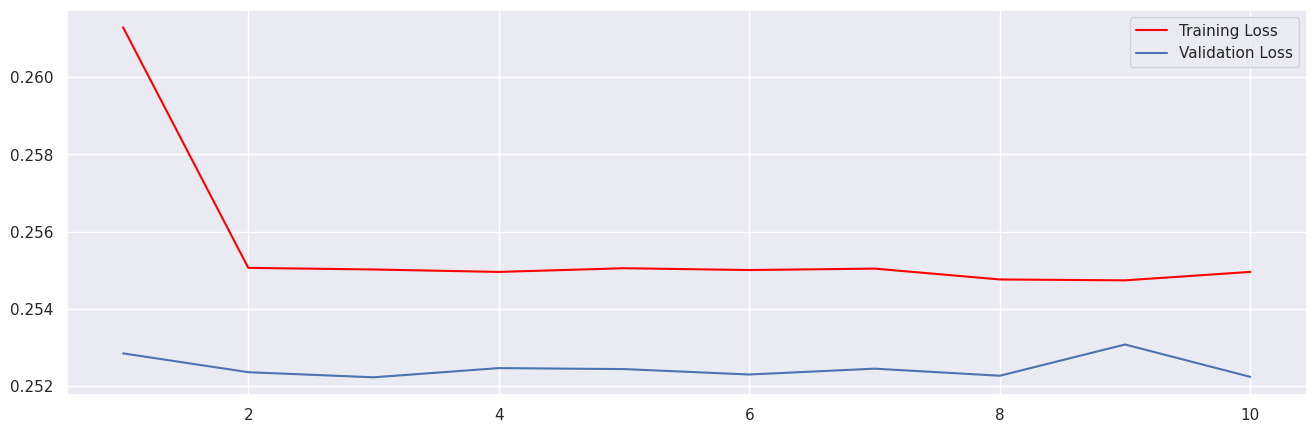

In [ ]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.show()

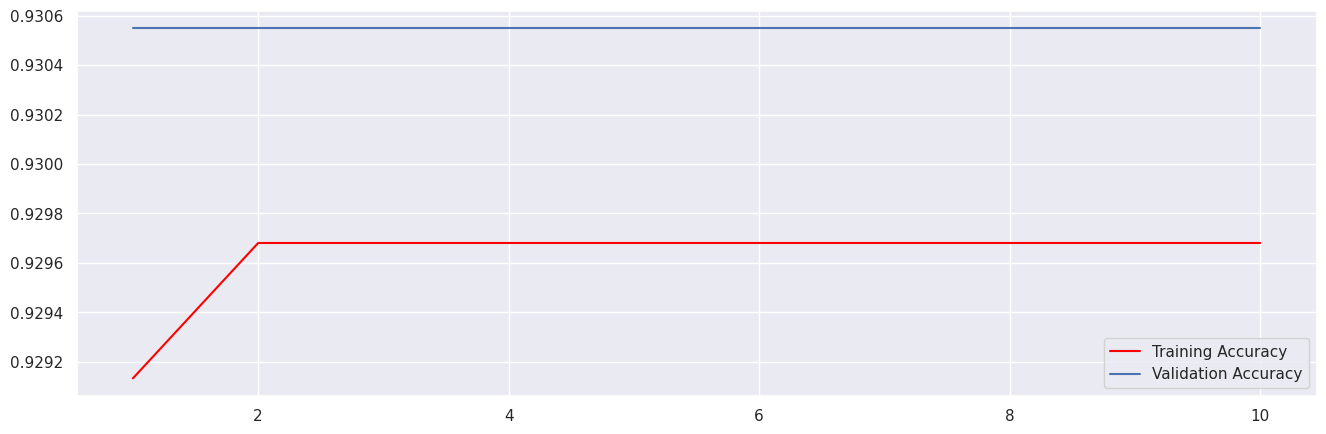

In [ ]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
"""validation_sentence = ['This movie was not good at all.It had some good parts like the acting was pretty good but the story was not impressing at all.']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded = pad_sequences (validation_sentence_tokened, maxlen=128,
                                            truncating='post', padding='post')
print(validation_sentence[0])
print("probability of positive: {}".format(model.predict(validation_sentence_padded)[0]))

In [ ]:
"""#After success run Drive FUSE program, you can create a directory Sentiment_Analysis and access your drive at /content/drive with using command
import os
os.mkdir("/content/drive/Sentiment_Analysis")
os.chdir("/content/drive/")
!ls"""

In [ ]:
#Append your path
"""
import sys
sys.path.append('/content/drive/Sentiment_Analysis')
"""

In [ ]:
#Now save the model in required directory
"""model.save('/content/drive/Sentiment_Analysis/sentiment_analysis_model_new.h5')
print("Saved model to disk")

In [ ]:
#Check the content of the directory
"""os.chdir("/content/drive/Sentiment_Analysis")
!ls

In [ ]:
#Code to load the saved model
"""model = load_model('/content/drive/Sentiment_Analysis/sentiment_analysis_model_new.h5')
print("Model Loaded")